# Seção 4: Filtro de Tamanho Arbitrário

O objetivo desta seção é implementar filtros de tamanho arbitrário n×n em Python, usando diferentes tipos de padding e explorar como diferentes funções de filtro (por exemplo, filtros Gaussianos para suavização e filtros Laplacianos para aguçamento) afetam as características da imagem. 

# Metodologia e Implementação

### Configurações do Projeto e Funções úteis


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calcular_histograma(imagem):    
    histograma = np.zeros(256, dtype=int)
        
    for valor in imagem.flatten():  
        histograma[valor] += 1  
    
    return histograma




## Implementação do Filtro com Tamanho Arbitrário:

O objetivo desta implementação é aplicar um filtro de tamanho arbitrário em uma imagem em escala de cinza. O filtro permite suavizar a imagem e reduzir o ruído, utilizando uma matriz de coeficientes que define como os pixels vizinhos devem influenciar o pixel central. Neste exemplo, um filtro de 7x5 é aplicado a uma imagem ruidosa gerada por meio da adição de ruído gaussiano.

Nesta implementação, uma função `aplicar_filtro_arbitrario` foi criada para aplicar o filtro à imagem. A função calcula a soma ponderada dos pixels na vizinhança de cada pixel, conforme definido pela matriz do filtro, e garante que o resultado permaneça dentro do intervalo válido de intensidades de pixel. Após a aplicação do filtro, a imagem filtrada é exibida ao lado da imagem original, demonstrando a eficácia do filtro na suavização e na redução de ruído. A abordagem é flexível e pode ser adaptada para usar diferentes tamanhos e formas de filtros.

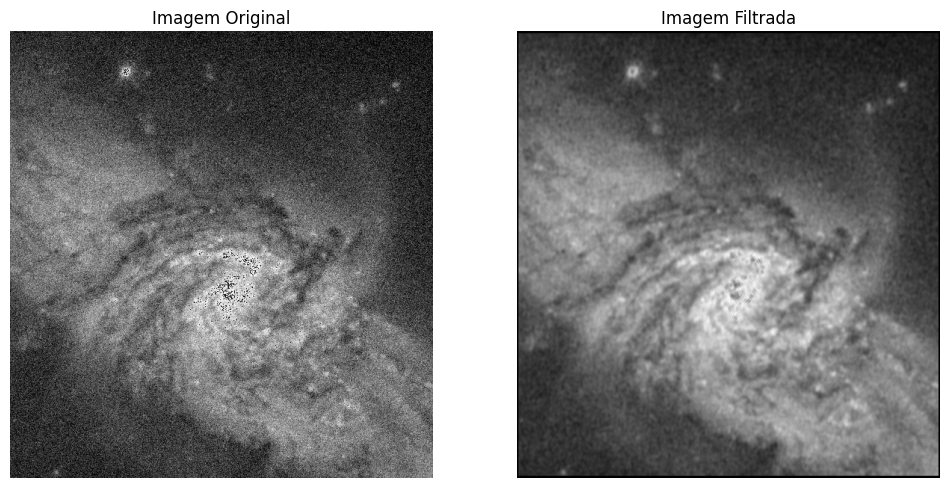

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def aplicar_filtro_arbitrario(image, filter_matrix):
    M, N = image.shape    
    K = filter_matrix.shape[1] // 2
    L = filter_matrix.shape[0] // 2
    
    filtered_image = np.zeros_like(image)    
    scale_factor = 1.0 / np.sum(filter_matrix)
    
    for u in range(K, M - K):
        for v in range(L, N - L):            
            sum_result = 0
            for i in range(-K, K + 1):
                for j in range(-L, L + 1):
                    
                    pixel_value = image[u + i, v + j]                    
                    filter_value = filter_matrix[j + L, i + K]
                    sum_result += pixel_value * filter_value
            
            result = int(round(scale_factor * sum_result))
            result = np.clip(result, 0, 255)  
            filtered_image[u, v] = result
            
    return filtered_image

image = cv2.imread('images/galaxy.tif', cv2.IMREAD_GRAYSCALE)

def soma_ruido_gaussiano(I, sigma):
    h, w = I.shape
    noise = np.random.normal(0, sigma, (h, w))
    I += noise
    return np.clip(I, 0, 255)

image_float = image.astype(np.float32) / 255.0
noisy_image = soma_ruido_gaussiano(image_float, 0.1) * 255
noisy_image = noisy_image.astype(np.uint8)

filter_matrix = np.array([
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0]
])

filtered_image = aplicar_filtro_arbitrario(noisy_image, filter_matrix)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Imagem Original')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagem Filtrada')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.show()


## Filtro Gaussiano

O filtro gaussiano é um filtro de suavização que utiliza uma função gaussiana para calcular os pesos dos pixels na vizinhança. Ao contrário do filtro de média, o filtro gaussiano dá mais peso aos pixels que estão mais próximos do pixel central, o que resulta em uma suavização mais natural e menos distorcida.

A função `gaussian_filter` cria uma matriz de filtro gaussiano, que é comumente utilizada em processamento de imagens para suavização e redução de ruído. Ela recebe dois parâmetros: `size`, que define a dimensão da matriz (tamanho do filtro), e `sigma`, que determina a largura da distribuição gaussiana. A função começa gerando um vetor `ax` que varia de `-(size // 2)` a `size // 2`, representando os eixos x e y do filtro. Em seguida, utiliza `np.meshgrid` para criar duas matrizes 2D (`xx` e `yy`) que contêm as coordenadas x e y, respectivamente. A função calcula os valores do filtro gaussiano aplicando a fórmula da distribuição gaussiana em cada ponto da grade, e depois normaliza a matriz resultante dividindo cada elemento pela soma total dos elementos da matriz. Isso garante que a soma dos pesos do filtro seja igual a 1, mantendo a intensidade da imagem após a filtragem.

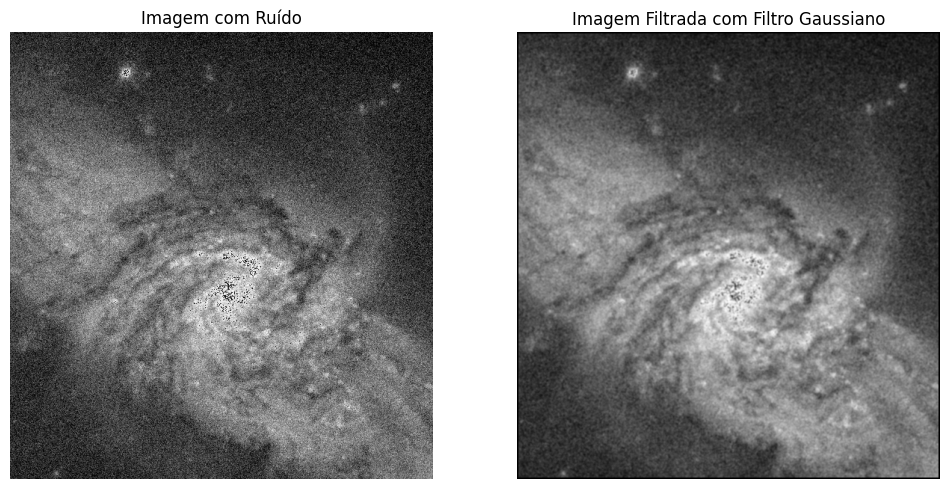

In [5]:
def gaussian_filter(size=5, sigma=1.0):
    """Cria uma matriz de filtro gaussiano."""
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    gauss = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return gauss / np.sum(gauss)

gaussian_matrix = gaussian_filter(size=5, sigma=1.0)
gaussian_filtered_image = aplicar_filtro_arbitrario(noisy_image, gaussian_matrix)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Imagem com Ruído')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagem Filtrada com Filtro Gaussiano')
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.axis('off')

plt.show()


## Filtro Laplaciano

O filtro laplaciano é um operador utilizado para aguçar imagens e destacar bordas ao calcular a segunda derivada da intensidade dos pixels. Ele tem uma matriz de 3x3 com um elemento central negativo e elementos adjacentes positivos, o que realça áreas de alta variação na intensidade. Ao aplicar o filtro, ele enfatiza contornos e detalhes, tornando-se uma ferramenta eficaz em detecção de bordas no processamento de imagens.

In [9]:
def laplacian_filter():
    """Cria uma matriz de filtro laplaciano."""
    laplacian_matrix = np.array([
        [0,  1, 0],
        [1, -4, 1],
        [0,  1, 0]
    ])
    return laplacian_matrix

noisy_image = noisy_image.astype(np.uint8)

laplacian_matrix = laplacian_filter()
laplacian_filtered_image = aplicar_filtro_arbitrario(noisy_image, laplacian_matrix)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Imagem com Ruído')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagem Filtrada com Filtro Laplaciano')
plt.imshow(laplacian_filtered_image, cmap='gray')
plt.axis('off')

plt.show()

/tmp/ipykernel_4446/878372877.py:11: RuntimeWarning: divide by zero encountered in divide
  scale_factor = 1.0 / np.sum(filter_matrix)


OverflowError: cannot convert float infinity to integer

## Filtro de Média
O **filtro de média** é um dos filtros mais simples e populares usados na filtragem de imagens. Ele suaviza a imagem reduzindo o ruído e as variações bruscas nas intensidades de pixels. O filtro calcula a média dos pixels em uma vizinhança definida e substitui o pixel central por essa média.

**Implementação**: A matriz de filtro de média é criada como uma matriz de tamanho n * n onde todos os elementos têm o mesmo valor, que é o inverso do número total de elementos da matriz. Quando aplicada, ela suaviza a imagem ao reduzir a influência de ruídos locais.


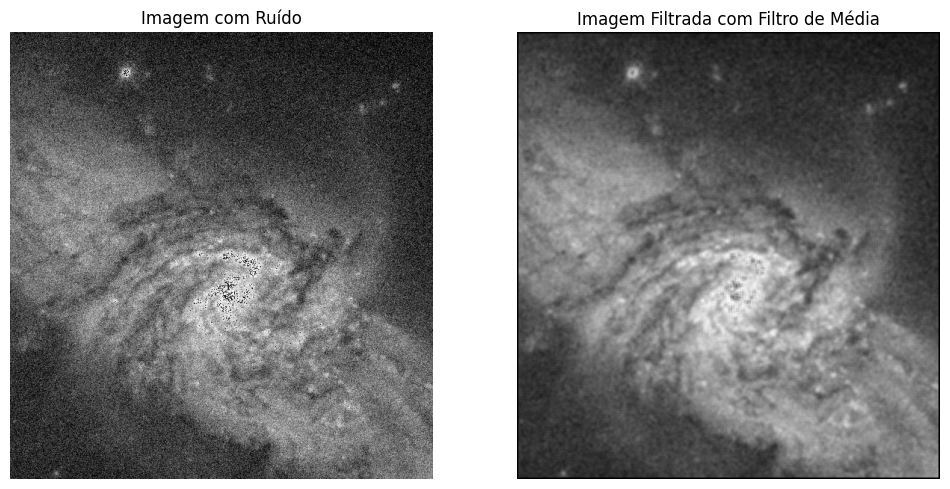

In [10]:
def media_filtro(size=3):
    """Cria uma matriz de filtro de média."""
    return np.ones((size, size)) / (size * size)

mean_matrix = media_filtro(size=5)
media_filtroed_image = aplicar_filtro_arbitrario(noisy_image, mean_matrix)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Imagem com Ruído')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagem Filtrada com Filtro de Média')
plt.imshow(media_filtroed_image, cmap='gray')
plt.axis('off')

plt.show()


## Filtro de Mediana
O ***filtro mediano*** é uma técnica de processamento de imagem eficaz para remover ruído, especialmente o tipo "sal e pimenta". Em vez de calcular a média dos pixels vizinhos, como fazem os filtros lineares, o filtro mediano substitui o valor de um pixel pela mediana dos valores dos pixels em sua vizinhança, preservando melhor as bordas e reduzindo o impacto de valores extremos.


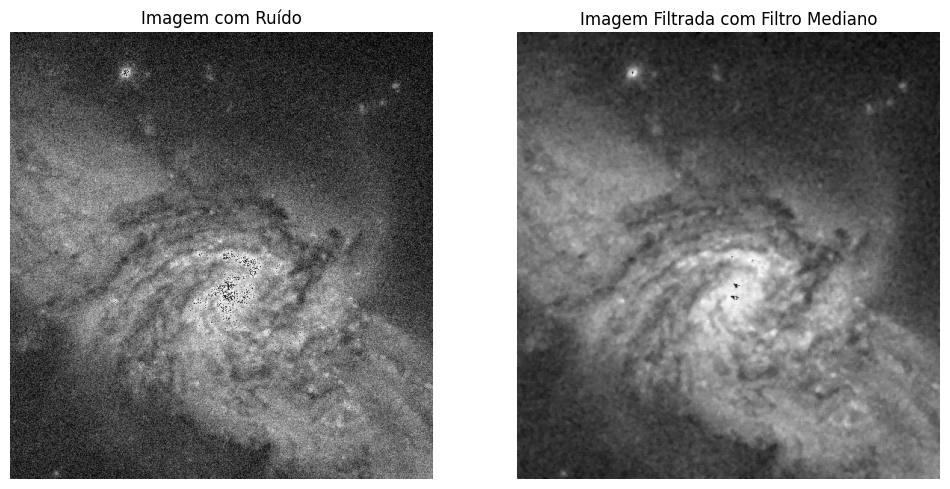

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_median_filter(image, size=3):
    """Aplica um filtro mediano à imagem."""
    M, N = image.shape
    pad_size = size // 2
    # Adiciona padding à imagem
    padded_image = np.pad(image, pad_size, mode='edge')
    filtered_image = np.zeros_like(image)

    for u in range(M):
        for v in range(N):
            # Nesta parte extrai a vizinhança do pixel
            neighborhood = padded_image[u:u + size, v:v + size]
            # Agora calculamos a mediana da vizinhança
            filtered_image[u, v] = np.median(neighborhood)

    return filtered_image

mean_matrix = media_filtro(size=5)  
media_filtroed_image = aplicar_filtro_arbitrario(noisy_image, mean_matrix)

median_filtered_image = apply_median_filter(noisy_image, size=5)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Imagem com Ruído')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagem Filtrada com Filtro Mediano')
plt.imshow(median_filtered_image, cmap='gray')
plt.axis('off')

plt.show()


## Experimentos com Diferentes Tipos de Padding

Quando aplicamos filtros, o tratamento das bordas da imagem se torna uma questão importante. Para isso, utilizamos diferentes tipos de padding:

- ***Zero Padding***: Os pixels fora da imagem são preenchidos com zeros. Isso pode causar artefatos em bordas, pois a informação do pixel externo é zero.

- ***Replicate Padding***: Os pixels nas bordas são replicados. Isso ajuda a manter a informação da borda, mas pode causar uma transição abrupta se houver uma diferença de intensidade.

- ***Reflect Padding***: A imagem é espelhada nas bordas. Isso cria uma transição mais suave nas bordas e ajuda a preservar a informação, resultando em um tratamento mais natural.

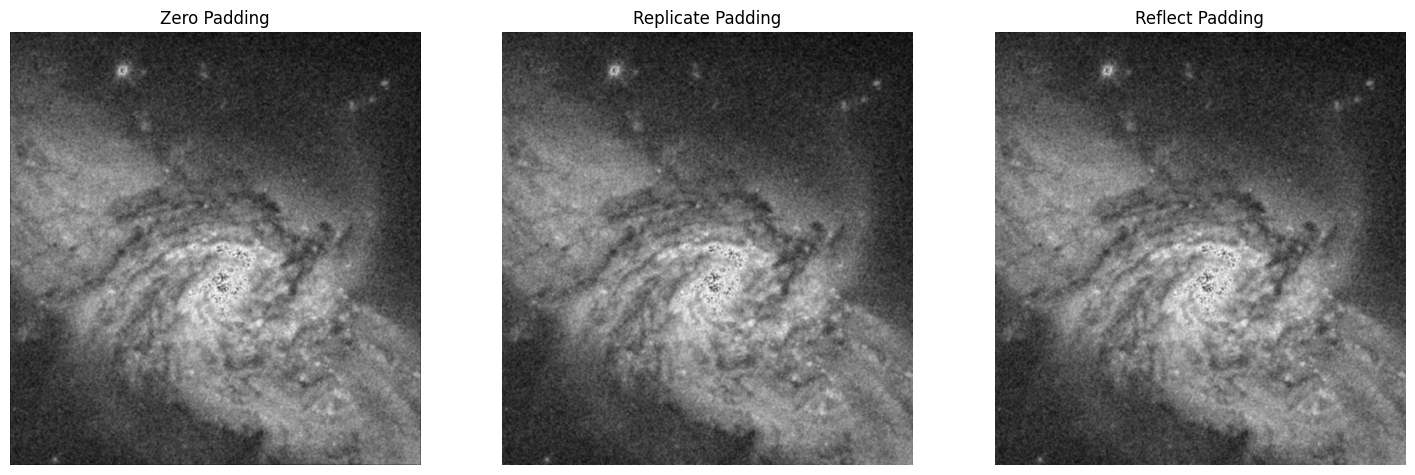

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def aplicar_filtro_arbitrario_padding(image, filter_matrix, padding_type='zero'):
    
    K = filter_matrix.shape[1] // 2
    L = filter_matrix.shape[0] // 2
    
    if padding_type == 'zero':
        padded_image = np.pad(image, [(L, L), (K, K)], mode='constant', constant_values=0)
    elif padding_type == 'replicate':
        padded_image = np.pad(image, [(L, L), (K, K)], mode='edge')
    elif padding_type == 'reflect':
        padded_image = np.pad(image, [(L, L), (K, K)], mode='reflect')
    else:
        raise ValueError("Tipo de padding inválido.")
    
    M, N = image.shape    
    filtered_image = np.zeros_like(image)
    
    scale_factor = 1.0 / np.sum(filter_matrix)

    for u in range(L, M + L):
        for v in range(K, N + K):            
            sum_result = 0
            for i in range(-K, K + 1):
                for j in range(-L, L + 1):
                    pixel_value = padded_image[u + j, v + i]                    
                    filter_value = filter_matrix[j + L, i + K]
                    sum_result += pixel_value * filter_value
            
            result = int(round(scale_factor * sum_result))
            result = np.clip(result, 0, 255)  
            filtered_image[u - L, v - K] = result
            
    return filtered_image


mean_matrix = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

filtered_image_zero_padding = aplicar_filtro_arbitrario_padding(noisy_image, mean_matrix, padding_type='zero')
filtered_image_replicate_padding = aplicar_filtro_arbitrario_padding(noisy_image, mean_matrix, padding_type='replicate')
filtered_image_reflect_padding = aplicar_filtro_arbitrario_padding(noisy_image, mean_matrix, padding_type='reflect')

plt.figure(figsize=(18, 12))
plt.subplot(1, 3, 1)
plt.title('Zero Padding')
plt.imshow(filtered_image_zero_padding, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Replicate Padding')
plt.imshow(filtered_image_replicate_padding, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Reflect Padding')
plt.imshow(filtered_image_reflect_padding, cmap='gray')
plt.axis('off')

plt.show()


# Análise e Conclusões
Neste estudo, implementamos e analisamos diferentes tipos de filtros e técnicas de padding em imagens. Os filtros de média, gaussiano e laplaciano têm propósitos distintos e demonstraram eficácia na suavização e no aguçamento de imagens ruidosas. A escolha do método de padding pode influenciar significativamente os resultados finais e deve ser considerada ao aplicar filtros em imagens.